# Images

## Setup

In [3]:
# pip install opencv-contrib-python
# pip install numpy scipy

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

By default, `cv2.imread()` creates a BGR image object. Because Jupyter notebooks use the RGB standard, images should be converted using `cv2.COLOR_BGR2RGB` before being displayed within a notebook. Hence the function `display()` that I created.

In [13]:
def display(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

## Reading, transforming, and displaying images
An OpenCV image is a 2D (x, y) or 3D (x, y, channel) array of the *numpy.array* type. By default, OpenCV follows the BGR order for the channels and each element of the array contains a byte-value (an int between 0 and 255).

The origin (0,0) or (0,0,0) is the upper left corner of the first channel.

In [14]:
# Create a dark grayscale image via numpy. Insert a white pixel in the middle.
img = np.zeros((3,3), dtype=np.uint8)
img.itemset((1,1), 255)
img

array([[  0,   0,   0],
       [  0, 255,   0],
       [  0,   0,   0]], dtype=uint8)

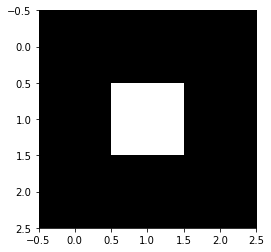

In [15]:
display(img)

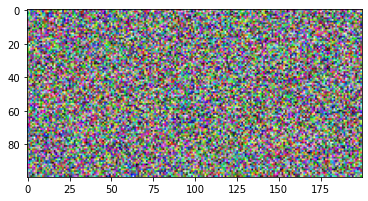

In [16]:
# Generate a random color image
img = np.random.randint(255, size=(100,200,3), dtype=np.uint8)
display(img)

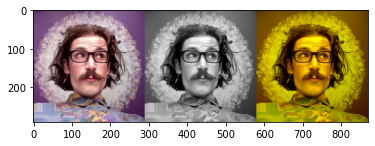

In [17]:
# Import an image
img = cv2.imread('MyPic.png', cv2.IMREAD_COLOR) # default read option -> stores it in a GBR format
imgGray = cv2.imread('MyPic.png', cv2.IMREAD_GRAYSCALE) # read and store it in a grayscale (single channel) format

# Only matrices with same dimensionality can be stacked, so the color channels have to be re-added to imgGray
# The image remains black and white as the GBR information was lost.
imgGray3Channels = cv2.cvtColor(imgGray, cv2.COLOR_GRAY2BGR)

# Set the blue channel of img (1st channel of the BGR array) to null
imgNoGreen = np.array(img, copy=True)
imgNoGreen[:,:,0] = 0

# Stack matrices and display the result
output = np.hstack((img, imgGray3Channels, imgNoGreen))
display(output)

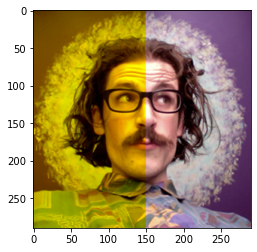

In [18]:
# By slicing, you can transform a region of an image and then paste it back on the original
myRegionOfInterest = imgNoGreen[:, 0:150]

img[:, 0:150] = myRegionOfInterest
display(img)

## `numpy.array`'s properties

In [9]:
# returns (height, width, number of channels)
print(img.shape)

(290, 290, 3)


In [10]:
# returns the array's total number of elements
print(img.size)

252300


In [11]:
# returns datatype of the array's elements
print(img.dtype)

uint8


In [4]:
import cv2

cameraCapture = cv2.VideoCapture(0)

while cv2.waitKey(1) == -1:
    success, frame = cameraCapture.read()
    if success:
        # Real-time image processing happens here:
        frame[:,:,0] = 0
        ###################
        display(frame)
    else:
        print("Could not read the camera stream.")
        break

cv2.destroyWindow()
cameraCapture.release()